# Série 3 - Résolution numérique d'EDO - Solutions

Le but de cette série d'exercice est de comprendre et implémenter les **méthodes numériques d'Euler et Runge Kutta** pour résoudre des équations différentielles ordinaires.

**Exercice 1 - Solution**

Définissez les variables contenant les paramètres définissant la solution au problème : $n_0$, $r$, $nmax$, ainsi qu'une fonction permettant de calculer la solution analytique exacte donnée ci-dessus.

Faite une figure représentant l'évolution du nombre de bactéries en fonction du temps sur une durée de 6 jours.


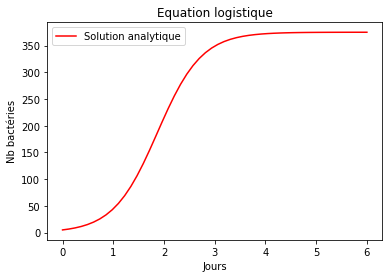

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du modèle
n0 = 5 # Population initiale : 5 bactéries
r = 2.3 # Taux de croissance en conditions idéales
nmax = 375 

def logistique(t,r,n0,nmax):
    """ Calcule la solution analytique exacte pour l'équation logistique """
    c = (nmax-n0)/n0
    return nmax/(1+c*np.exp(-r*t))

# Préparation du graphe
tmax = 6 # Durée de simulation
ta = np.linspace(0,tmax) # Valeurs de temps pour la représentation graphique
na = logistique(ta,r,n0,nmax) # Calcul de la population correspondante

# Affichage des résultats
plt.plot(ta, na, 'r-', label='Solution analytique')
plt.xlabel('Jours')
plt.ylabel('Nb bactéries')
plt.title('Equation logistique')
plt.legend()
plt.show()

In [2]:
print(ta[15],na[15])

1.836734693877551 180.04375002047962


# Résolution numérique avec la méthode d'Euler

**Exercice 2 - solution**

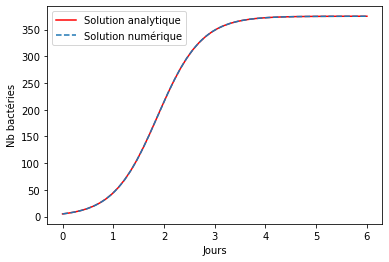

In [3]:
# Pas de temps pour la méthode numérique
dt = 0.0001

# Initialisation des variables
nt = int(tmax/dt) + 1
t = np.linspace(0,tmax,nt)
n = np.zeros(nt)
n[0] = n0

# Résolution à l'aide de la méthode d'Euler
for i in range(1,nt):
    n[i] = n[i-1] + dt * r * n[i-1] * (1 - n[i-1] / nmax)

# Affichage et comparaison des résultats
plt.plot(ta, na ,'r-', label='Solution analytique')
plt.plot(t, n, '--', label='Solution numérique')
plt.xlabel('Jours')
plt.ylabel('Nb bactéries')
plt.legend()
plt.show()

**Remarque** : La qualité de la solution est excellente, les deux courbes se superposent parfaitement.

**Exercice 3 - solution** 

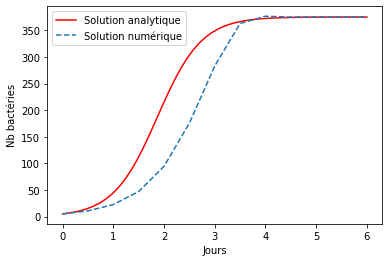

In [4]:
# Pas de temps pour la méthode numérique
dt = 0.5

# Initialisation des variables
nt = int(tmax/dt) + 1
t = np.linspace(0,tmax,nt)
n = np.zeros(nt)
n[0] = n0

# Résolution à l'aide de la méthode d'Euler
for i in range(1,nt):
    n[i] = n[i-1] + dt * r * n[i-1] * (1 - n[i-1] / nmax)

# Affichage et comparaison des résultats
plt.plot(ta, na ,'r-', label='Solution analytique')
plt.plot(t, n, '--', label='Solution numérique')
plt.xlabel('Jours')
plt.ylabel('Nb bactéries')
plt.legend()
plt.show()

**Observation:** Pour un pas de temps trop grand, la méthode d'Euler donne des résultats avec une erreur importante par rapport à la solution analytique. Il faut donc bien s'assurer que le pas de temps est petit par rapport à la vitesse avec laquelle varie la solution de l'équation différentielle.

# Résolution numérique avec la méthode de Runge-Kutta

**Exercice 4 - Solution** 

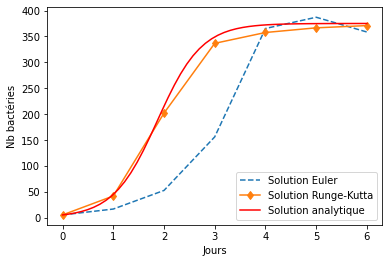

In [5]:
# Pas de temps pour la méthode numérique
dt = 1.

# Initialisation des variables
nt = int(tmax/dt) + 1
t = np.linspace(0,tmax,nt)

def g(n):
    return  r * n * (1 - n / nmax)

# Intégration à l'aide de la méthode d'Euler
ne = np.zeros(nt)
ne[0] = n0
for i in range(1,nt):
    ne[i] = ne[i-1] + dt * g( ne[i-1] )
    

# Intégration à l'aide de la méthode de Runge-Kutta
nrk = np.zeros(nt)
nrk[0] = n0
for i in range(1,nt):
    k1 = g( nrk[i-1] ) 
    k2 = g( nrk[i-1] + 0.5* dt * k1 ) 
    k3 = g( nrk[i-1] + 0.5* dt * k2 ) 
    k4 = g( nrk[i-1] + dt * k3 ) 
    nrk[i] = nrk[i-1] + dt * ( k1  + 2*k2 + 2*k3  + k4  ) / 6
    
# Affichage et comparaison des résultats
plt.plot(t, ne, '--', label='Solution Euler')
plt.plot(t, nrk, '-d', label='Solution Runge-Kutta')
plt.plot(ta, na ,'r-', label='Solution analytique')
plt.xlabel('Jours')
plt.ylabel('Nb bactéries')
plt.legend()
plt.show()   

**Observations** : 
- Avec un pas de temps de 0.5, la solution calculée avec la méthode de Runge-Kutta est très proche de la solution analytique, alors que la méthode d'Euler est beaucoup moins précise. 
- Si l'on réduit le pas de temps, l'écart entre les deux méthodes diminuent. Elles tendent toutes les deux vers la solution analytique.
- Pour des pas de temps grands on voit apparaitre des oscilations dans les résultats de la méthode d'Euler. La méthode de Runge-Kutta est plus stable dans ce cas, mais commence à montrer des erreurs importantes.